In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_segmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df = df.dropna()

Feature Engineering

In [8]:
df["Total_Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df["Education"] = df["Education"].replace({"Master":"Postgraduate", "PhD":"Postgraduate", "Graduation":"Graduate", "Basic":"Undergraduate","2n Cycle":"Undergraduate",})
df["Living_With"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df["Age"] = 2024 - df["Year_Birth"]
df["Children"] = df["Kidhome"] + df["Teenhome"]
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold", "Kidhome": "KidsAtHome"})
df = df.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
KidsAtHome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
Wines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
Fruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
Meat,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
Fish,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
Sweets,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0
Gold,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.00,321.0


Data Visualization

<Axes: xlabel='Age', ylabel='Total_Spent'>

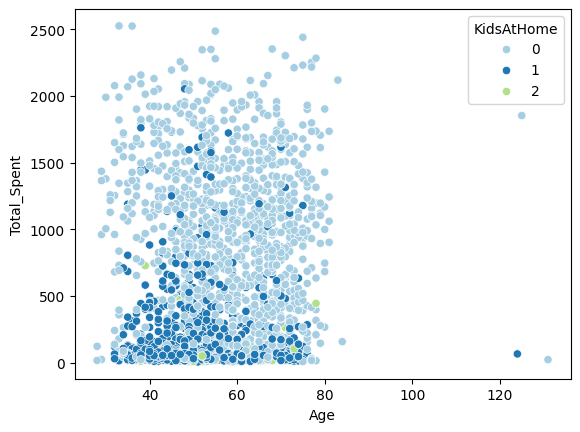

In [10]:
sns.scatterplot(x='Age', y='Total_Spent', hue='KidsAtHome', palette='Paired', data=df)

Here we can see that the more kids are at home, the more a customer spends

### Preparing for PCA

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [12]:
df.columns

Index(['Education', 'Income', 'KidsAtHome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Total_Spent',
       'Living_With', 'Age', 'Children'],
      dtype='object')

In [13]:
categorical_features =[]

# Collecting non-numeric values
categorical_features = (df.dtypes[df.dtypes == 'object'].index)
label = LabelEncoder()
for i in categorical_features:
    df[i] = df[[i]].apply(label.fit_transform)

In [14]:
# These are binary features
num_df = df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1)
scaler = StandardScaler()
scaler.fit(num_df)
scaled = pd.DataFrame(scaler.transform(num_df), columns= num_df.columns)
scaled.head()

,Education,Income,KidsAtHome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Total_Spent,Living_With,Age,Children
0,-0.894187,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,1.428553,2.504712,-0.554143,0.693232,-0.097812,2.377952,1.675488,-1.348829,0.986443,-1.264803
1,-0.894187,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-1.125881,-0.571082,-1.169518,-0.131574,-0.097812,-0.420530,-0.962358,-1.348829,1.236801,1.405806
2,-0.894187,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,1.428553,-0.229327,1.291982,-0.543978,-0.097812,-0.420530,0.280250,0.741384,0.318822,-1.264803
3,-0.894187,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-0.760962,-0.912837,-0.554143,0.280829,-0.097812,-0.420530,-0.919224,0.741384,-1.266777,0.070501
4,0.569268,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,0.333796,0.112428,0.061232,-0.131574,-0.097812,-0.420530,-0.307044,0.741384,-1.016420,0.070501


### PCA

In [15]:
pca = PCA(n_components=3)
pca.fit(scaled)
pca_ds = pd.DataFrame(pca.transform(scaled), columns=(["ft1","ft2", "ft3"]))
pca_ds.head()

,ft1,ft2,ft3
0,4.612083,-0.156357,2.388532
1,-2.760417,0.547249,-0.791861
2,2.096183,-0.501954,-0.478715
3,-2.536596,-1.455726,0.412469
4,-0.444029,-0.124856,0.092604


### K-Means Algorithm

In [16]:
from sklearn.cluster import KMeans

In [17]:
# Setting up for elbow method
error = []
for n in range(1, 15):
    model = KMeans(n_clusters=n)
    model.fit(df)
    error.append(model.inertia_)

print(error)

[1404800276771.7002, 674929644109.2805, 319717878354.03076, 183500459165.09598, 122584320356.19821, 81308327522.36888, 53792982167.54333, 40318039533.75226, 31855524470.980328, 24781629333.471977, 19348674976.296146, 16494497911.917091, 13404503517.235931, 11234193634.211342]


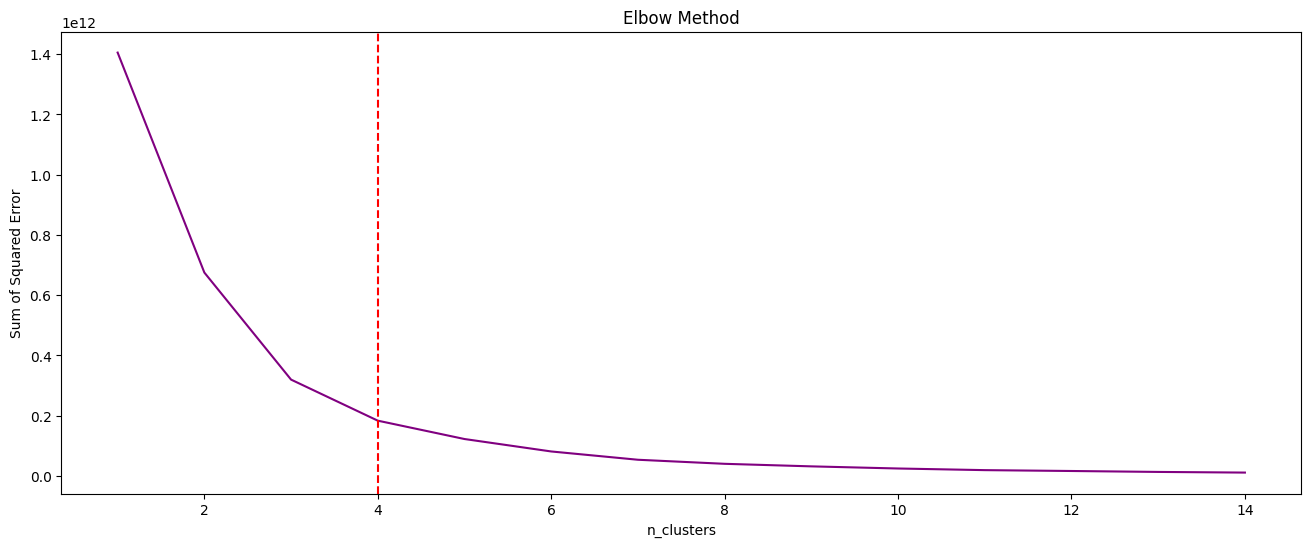

In [18]:
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(x=range(1,15), y=error, color='purple')
ax.set_title('Elbow Method')
ax.set_xlabel('n_clusters')
ax.set_ylabel('Sum of Squared Error')
ax.axvline(x=4, color='red', linestyle='--')

#### Using n_cluster = 4

In [19]:
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(pca_ds)
pca_ds['cluster'] = y_pred
pca_ds.head(25)

,ft1,ft2,ft3,cluster
0,4.612083,-0.156357,2.388532,1
1,-2.760417,0.547249,-0.791861,3
2,2.096183,-0.501954,-0.478715,1
3,-2.536596,-1.455726,0.412469,0
4,-0.444029,-0.124856,0.092604,3
5,0.779037,1.143284,-0.365470,2
6,0.689874,1.147743,0.348120,2
7,-2.330488,-1.074534,0.913410,0
8,-2.677870,-1.417663,2.252396,0
9,-4.881581,1.091236,0.671983,3


### Identifying What Each Cluster Represents

In [ ]:
# Taking a look at features before being passed into PCA for a better understanding
df['cluster'] = y_pred
df.head()

,Education,Income,KidsAtHome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spent,Living_With,Age,Children,cluster
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,1,1617,0,67,0,1
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,27,0,70,2,3
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,776,1,59,0,1
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,53,1,40,1,0
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,422,1,43,1,3


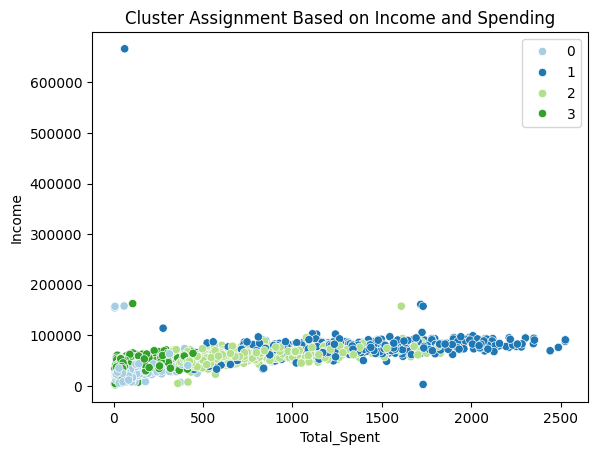

In [26]:
pl = sns.scatterplot(data = df, x=df["Total_Spent"], y=df["Income"],hue=df["cluster"], palette= 'Paired')
pl.set_title("Cluster Assignment Based on Income and Spending")
plt.legend()
plt.show()

In [30]:
grouped = df.groupby('cluster')
grouped.mean()

,Education,Income,KidsAtHome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spent,Living_With,Age,Children
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.693980,30650.677258,0.785953,0.021739,47.866221,33.740803,6.714047,26.020067,10.207358,6.966555,...,0.005017,0.000000,0.001672,0.000000,0.011706,0.127090,101.224080,0.640468,46.961538,0.807692
1,0.557971,76959.451087,0.025362,0.115942,48.940217,611.978261,67.771739,458.190217,99.456522,70.005435,...,0.121377,0.266304,0.210145,0.034420,0.003623,0.295290,1384.123188,0.606884,55.567029,0.141304
2,0.559160,60613.498092,0.198473,0.948473,48.572519,517.526718,28.051527,163.185115,36.700382,28.494275,...,0.146947,0.028626,0.041985,0.017176,0.011450,0.131679,842.444656,0.660305,59.293893,1.146947
3,0.623616,42818.660517,0.721402,1.007380,50.776753,86.549815,4.208487,29.654982,5.848708,3.977860,...,0.031365,0.000000,0.005535,0.003690,0.011070,0.046125,146.254613,0.675277,59.874539,1.728782


#### Selecting two random units

In [33]:
import random

In [ ]:
len(df[df['cluster'] == 0])

598

8

In [39]:
df[df['cluster'] == 0].iloc[random.randint(0,598)]

Education                  0.0
Income                 33697.0
KidsAtHome                 1.0
Teenhome                   0.0
Recency                   34.0
Wines                      4.0
Fruits                     3.0
Meat                       7.0
Fish                       0.0
Sweets                     3.0
Gold                      11.0
NumDealsPurchases          1.0
NumWebPurchases            1.0
NumCatalogPurchases        0.0
NumStorePurchases          2.0
NumWebVisitsMonth          7.0
AcceptedCmp3               1.0
AcceptedCmp4               0.0
AcceptedCmp5               0.0
AcceptedCmp1               0.0
AcceptedCmp2               0.0
Complain                   0.0
Response                   0.0
Total_Spent               28.0
Living_With                0.0
Age                       54.0
Children                   1.0
cluster                    0.0
Name: 748, dtype: float64

In [32]:
len(df[df['cluster'] == 1])

552

In [40]:
df[df['cluster'] == 1].iloc[random.randint(0, 552)]

Education                  0.0
Income                 71613.0
KidsAtHome                 0.0
Teenhome                   0.0
Recency                   26.0
Wines                    426.0
Fruits                    49.0
Meat                     127.0
Fish                     111.0
Sweets                    21.0
Gold                      42.0
NumDealsPurchases          1.0
NumWebPurchases            8.0
NumCatalogPurchases        2.0
NumStorePurchases         10.0
NumWebVisitsMonth          4.0
AcceptedCmp3               0.0
AcceptedCmp4               0.0
AcceptedCmp5               0.0
AcceptedCmp1               0.0
AcceptedCmp2               0.0
Complain                   0.0
Response                   0.0
Total_Spent              776.0
Living_With                1.0
Age                       59.0
Children                   0.0
cluster                    1.0
Name: 2, dtype: float64